# Applied Analytics Portfolio

**Predicting and Explaining Healthcare App Quality**

Group: `_1_`

Names & Student IDs: `Louis - `、`Christian - `、`Min Zhu - 5607778`

---

## 1. Introduction

Briefly describe the **decision context**:

- Mental health unit that wants to recommend high-quality healthcare apps.
- Patients have a range of mental illnesses and somatic comorbidities.

Explain **why prediction helps** and what the **overall goal** of this portfolio is:

- Use app metadata and user reviews to estimate whether an app is likely to be highly rated.
- Identify key factors that drive user-perceived app quality.

Conclude with a short **structure overview** of the notebook/report (what is done in Sections 2–5).

## 2. Data Understanding and Preparation

### 2.1 Research Goal and Operationalization
- Formulate a **precise prediction question**.
- Define what **"high-quality" / "highly rated"** means (e.g., rating threshold + minimum number of ratings).
- Specify which apps you will include (e.g., which categories, filters).

### 2.2 Data Overview

> We examined the App Store and found that most mental health apps fall under the categories `Gesundeit und Fitness` and `Medizin`, with some also in `Lifestyle`. So, we used SQL to filter the data: 
> WHERE category IN ('Medizin','Gesundheit und Fitness','Lifestyle').

- Number of apps and reviews after filtering.
    - apps: `46324` / 55485 (83%)
        - Medizin: `12947` (23%)
        - Gesundeit und Fitness: `29917`(23.9%)
        - lifestyle: `3460` (62%)
    - reviews: `443945` / 520353 (85%)
        - Medizin: `35472` (6.8%)
        - Gesundeit und Fitness: `390203` (74.9%)
        - lifestyle: `18270` (3.5%)
- Brief description of key variables (metadata and text).

In [ ]:
# 2. Data Understanding and Preparation
# TODO: Load your datasets here and perform basic checks
import pandas as pd

# Merge on app_id and show
apps = pd.read_csv('/Users/louigi/Downloads/apple_apps_202512031523.csv')
reviews = pd.read_csv('/Users/louigi/Downloads/app_reviews_202512031514.csv')

df = reviews.merge(apps, on="app_id", how="left")
apps.head()

,app_id,link,app_name,developer_name,category,price,description,similar_apps,review_count,review_average,...,privacy_linked,privacy_unlinked,privacy_tracked,privacy_not_collected,version_history,in_app_purchases,privacy_policy_link,rank_from_pickle,privacy_not_collected_bool,price_eur
0,1262956827,https://apps.apple.com/de/app/nclex-rn-tests-p...,NCLEX-RN tests - practice exam preparation,Duy Le,Medizin,"0,00 €",NCLEX-RN (National Council Licensure Examinati...,"[""https://apps.apple.com/de/app/nclex-rn-prep-...",0,0.0,...,NaN,NaN,NaN,NaN,"[{""versionDisplay"": ""1.0"", ""releaseNotes"": ""Th...",[],NaN,NaN,False,0.0
1,1262972793,https://apps.apple.com/de/app/studio360-cycle/...,Studio360 Cycle,Studio360,Gesundheit und Fitness,"0,00 €",Studio360 Cycle is the newest fitness revoluti...,"[""https://apps.apple.com/de/app/platfrm/id1637...",0,0.0,...,"[""Gesundheit und Fitness"", ""Kontakt­informa­ti...","[""Diagnose""]",NaN,NaN,"[{""versionDisplay"": ""1.1.6"", ""releaseNotes"": ""...",[],https://appliquette.com.au/privacy-policy/,NaN,False,0.0
2,1263008542,https://apps.apple.com/de/app/smoke-finance/id...,Smoke Finance,"LAIFKHAK STUDIO, OOO",Gesundheit und Fitness,"0,00 €",It's no secret that cigarettes take a lof of m...,"[""https://apps.apple.com/de/app/smoki-quit-smo...",0,0.0,...,NaN,"[""Gekaufte Artikel"", ""Kennungen"", ""Diagnose""]",NaN,NaN,"[{""versionDisplay"": ""2.3"", ""releaseNotes"": ""1....","[""App full version: 2,99 €"", ""App full version...",http://lifehack.studio/privacy/smokefin.html,NaN,False,0.0
3,1263023770,https://apps.apple.com/de/app/womens-golf-netw...,Women's Golf Network,Sherree Elm,Gesundheit und Fitness,"0,00 €",NOTE: This app should be used with a Women’s G...,"[""https://apps.apple.com/de/app/empowerfit/id6...",0,0.0,...,NaN,NaN,NaN,NaN,"[{""versionDisplay"": ""1.1"", ""releaseNotes"": ""Mi...",[],https://www.wellnessliving.com/text/privacy.html,NaN,False,0.0
4,1263031757,https://apps.apple.com/de/app/white-noise-natu...,White Noise - Natural Calm Sounds for Sleep Cycle,Aamir Elahi,Gesundheit und Fitness,"0,00 €","Select sounds and melodies that you like, comb...","[""https://apps.apple.com/de/app/sonus-noise-ma...",1,5.0,...,NaN,"[""Nutzungs­daten""]","[""Nutzungs­daten""]",NaN,"[{""versionDisplay"": ""1.1"", ""releaseNotes"": ""Th...","[""Remove Ads: 1,99 €""]",NaN,NaN,False,0.0


### 2.3 Cleaning and Filtering
- Handle outliers (e.g., extreme prices, extremely low number of ratings).
    - 0 <= `review_average`, `rating` <= 5
    - `review_one`,`review_two`,`review_there`,`review_four`, `review_five`: int & >=0
    - `size`,`price` >= 0
- Check missing values in important variables and decide on imputation vs. dropping.
    - keep: because they carry meaningful information.
        - `iphone_version`、`ipad_version`、`ipod_version`、`mac_version`
        - `privacy_linked`、`privacy_unlinked`、`privacy_tracked`、`privacy_policy_link`
        - `rank_from_pickle`
    - imputation:
        - `privacy_not_collected_boolean`: base on `privacy_not_collected`  (`text => boolean`)
        - `price_eur`: base on `price` (`text => float`)
    - dropping: 
        - Apps data without app_reviews record. (35578 data)
        - `review`: The content contains only `None` or `null`. (3 data)
- Document inclusion criteria and any comparator groups (e.g., medical vs. non-medical apps). `⭐️ Todo`

In [7]:
# check missing values: NULL
df.isna().sum()

review_id                          0
app_id                             0
date                               0
developerresponse             356242
review                             0
rating                             0
isedited                           0
username                           0
title                              0
link                               0
app_name                           0
developer_name                     0
category                           0
price                              0
description                        0
similar_apps                       0
review_count                       0
review_average                     0
review_one                         0
review_two                         0
review_three                       0
review_four                        0
review_five                        0
iphone_version                  1107
ipad_version                  167142
ipod_version                  108527
mac_version                   285934
s

In [8]:
# check missing data: 0
# keep: all missing data is `int | boolean`
(df == 0).sum()

review_id                          0
app_id                             0
date                               0
developerresponse                  0
review                             0
rating                             0
isedited                      435893
username                           0
title                              0
link                               0
app_name                           0
developer_name                     0
category                           0
price                              0
description                        0
similar_apps                       0
review_count                     790
review_average                   790
review_one                      7891
review_two                     17081
review_three                   12777
review_four                     8801
review_five                     2683
iphone_version                     0
ipad_version                       0
ipod_version                       0
mac_version                        0
s

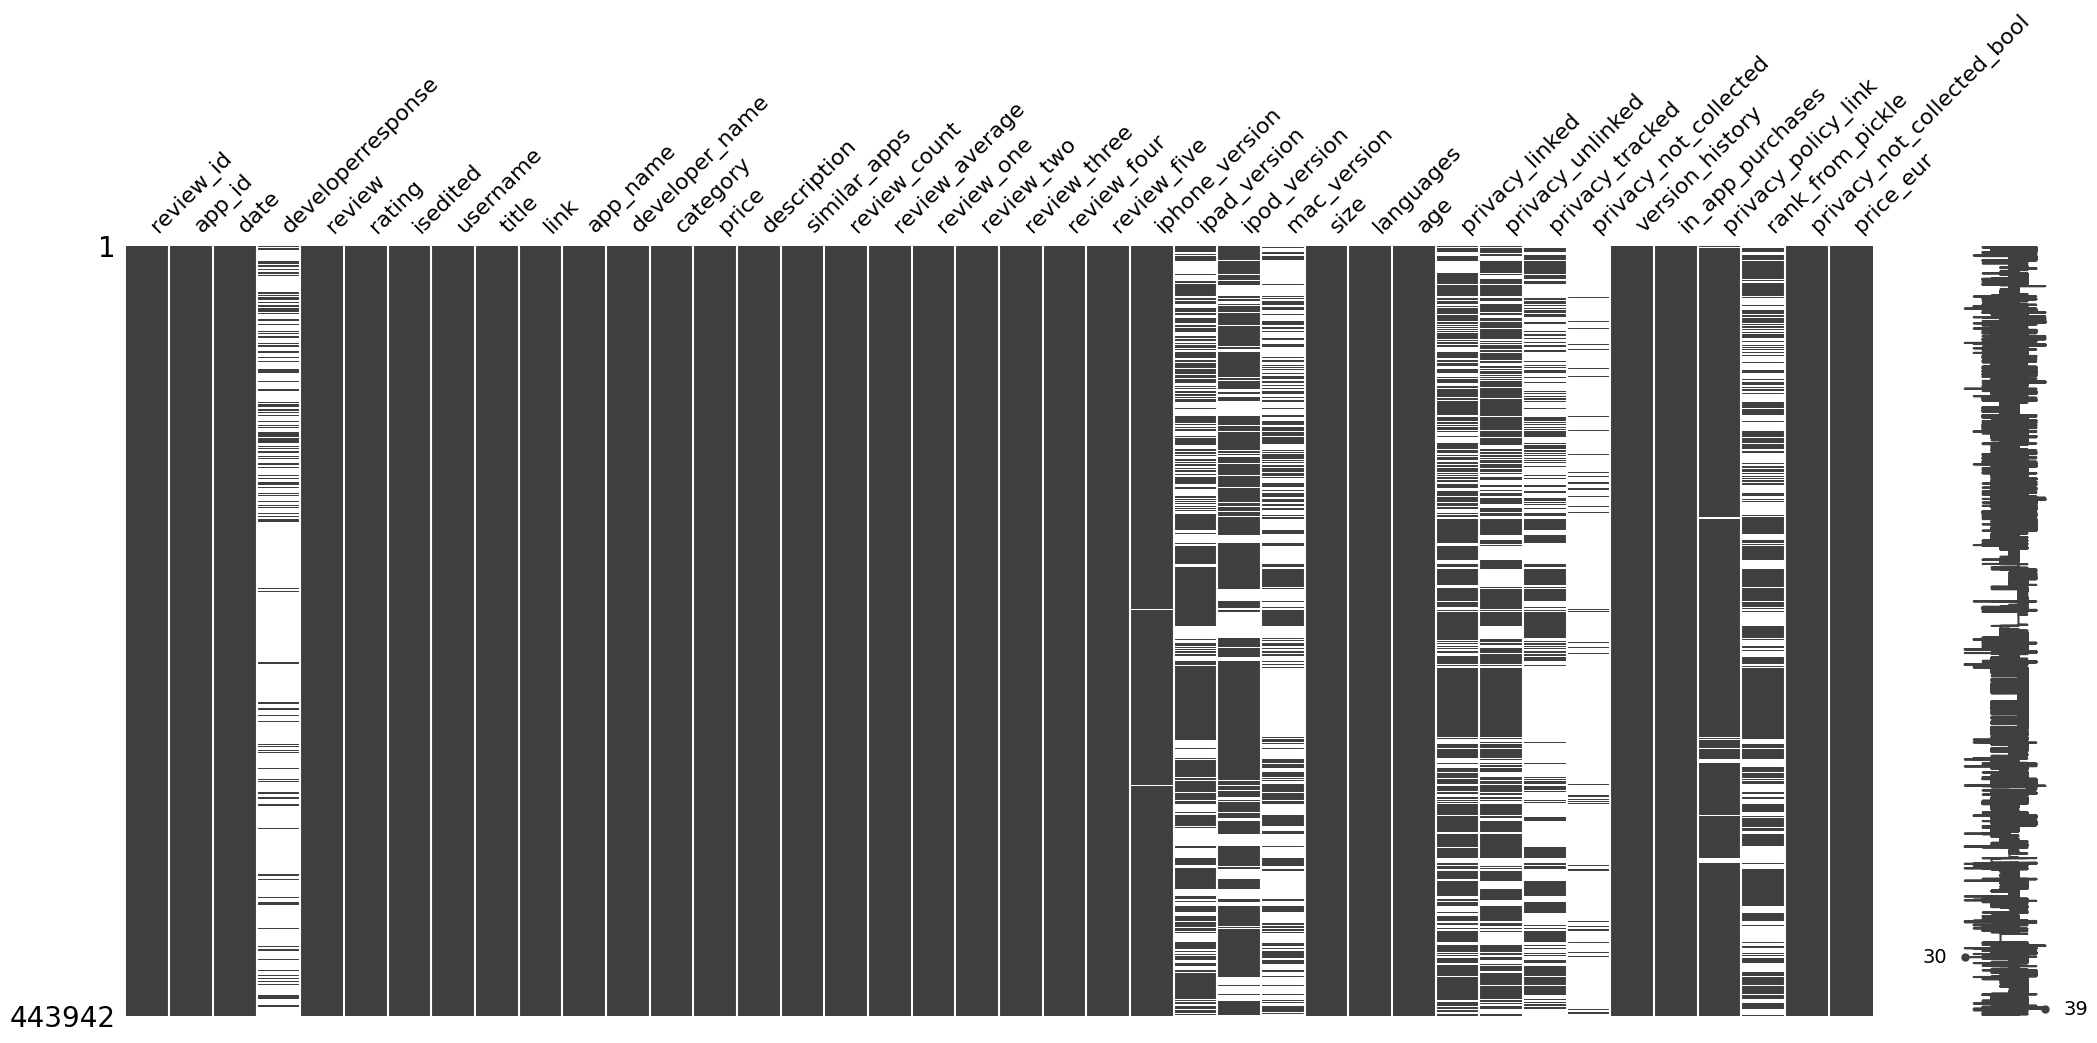

In [9]:
# visualize missing data
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

In [15]:
print("Apps – Anzahl Zeilen:", apps.shape[0])
print("Apps – Anzahl Spalten:", apps.shape[1])
print("Reviews – Anzahl Zeilen:", reviews.shape[0])
print("Reviews – Anzahl Spalten:", reviews.shape[1])

Apps – Anzahl Zeilen: 55485
Apps – Anzahl Spalten: 30
Reviews – Anzahl Zeilen: 520353
Reviews – Anzahl Spalten: 9


In [12]:
df["review_length"] = df["review"].astype(str).apply(len)
df["has_dev_response"] = df["developerresponse"].notnull().astype(int)
df["title_length"] = df["title"].astype(str).apply(len)
df["is_edited"] = df["isedited"].fillna(0)


In [ ]:
numeric_df = df[[
    "rating", "review_length", "has_dev_response", 
    "title_length", "is_edited",
    "price", "review_average", "review_count"
]]

correlations = numeric_df.corr(numeric_only=True)
correlations


,rating,review_length,has_dev_response,title_length,is_edited,review_average,review_count
rating,1.000000,-0.234763,-0.194075,-0.235682,-0.007784,0.329427,0.080276
review_length,-0.234763,1.000000,0.151322,0.293988,0.072671,-0.074622,-0.014960
has_dev_response,-0.194075,0.151322,1.000000,0.117867,0.269527,0.024305,-0.013635
title_length,-0.235682,0.293988,0.117867,1.000000,0.037216,-0.070629,0.017939
is_edited,-0.007784,0.072671,0.269527,0.037216,1.000000,0.006353,0.015452
review_average,0.329427,-0.074622,0.024305,-0.070629,0.006353,1.000000,0.226364
review_count,0.080276,-0.014960,-0.013635,0.017939,0.015452,0.226364,1.000000


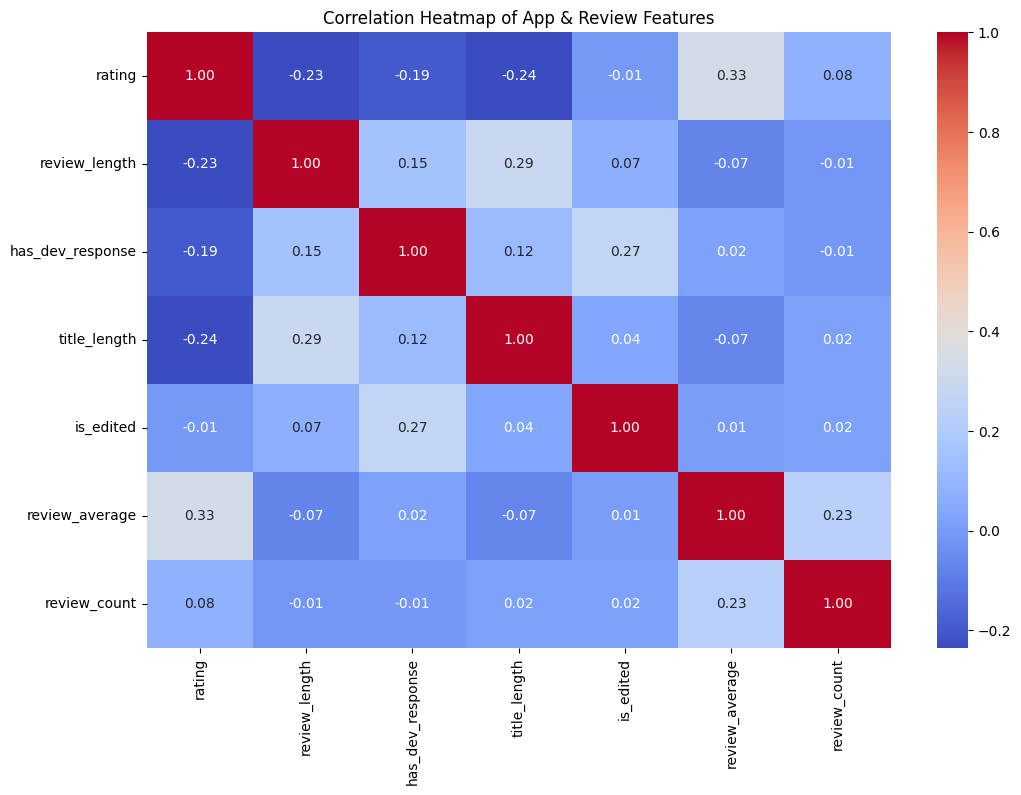

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of App & Review Features")
plt.show()


## 3. Data Exploration

- Explore distributions of ratings, number of ratings, prices, categories, etc.
- Visualize relevant relationships (e.g., rating vs. price, rating vs. category).
- Use basic text mining on reviews: word frequencies, simple sentiment or topic structure.
- Create and justify **new features** that may help prediction (e.g., sentiment score, review length, price bins).
- Comment on what these patterns suggest about app quality.

In [ ]:
# 3. Data Exploration
# TODO: EDA plots and feature creation
import matplotlib.pyplot as plt

# Example placeholder:
# apps['log_ratings'] = np.log1p(apps['ratingCount'])
# apps['averageRating'].hist()
# plt.show()


In [81]:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning & Topic Modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sicherstellen, dass NLTK den richtigen Pfad kennt
import nltk
nltk.data.path.append('/Users/louigi/nltk_data')


In [82]:
# Deutsche + englische Stopwords
stop_words_de = set(stopwords.words("german"))
stop_words_en = set(stopwords.words("english"))
stop_words = stop_words_de.union(stop_words_en)

lemm = WordNetLemmatizer()


In [83]:
def clean_review(text):
    text = text.lower()
    text = re.sub(r'[^a-zäöüß\s]', '', text)  # deutsche Buchstaben behalten
    tokens = text.split()
    tokens = [lemm.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

df = reviews.copy()
df["clean_review"] = df["review"].astype(str).apply(clean_review)


In [84]:
all_words = " ".join(df["clean_review"]).split()
word_freq = Counter(all_words)
top_30_words = word_freq.most_common(30)

print("Top 30 Wörter:")
for word, freq in top_30_words:
    print(word, freq)


Top 30 Wörter:
app 352939
mehr 78373
gut 69467
super 69026
einfach 52450
immer 49930
update 47766
seit 47088
leider 46043
funktioniert 41682
schon 39515
mal 38940
gibt 31862
finde 31618
macht 30995
wirklich 28893
wäre 27286
gute 24756
schade 22747
beim 22347
tolle 22031
zufrieden 20920
geht 20793
iphone 20745
bitte 20296
viele 20033
daten 19116
tag 18527
version 17970
apple 17938


In [85]:
tfidf = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf.fit_transform(df["clean_review"])
tfidf_features = tfidf.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray().mean(axis=0)
tfidf_top = sorted(zip(tfidf_features, tfidf_scores), key=lambda x: x[1], reverse=True)[:20]

print("Top 20 TF-IDF Wörter:")
for word, score in tfidf_top:
    print(word, round(score, 4))


Top 20 TF-IDF Wörter:
app 0.2037
super 0.0685
gut 0.0622
mehr 0.0551
einfach 0.0478
immer 0.0397
update 0.0382
funktioniert 0.0379
leider 0.0369
seit 0.0359
schon 0.0313
mal 0.0306
macht 0.0293
gute 0.0288
finde 0.0266
gibt 0.0263
tolle 0.0258
wirklich 0.025
zufrieden 0.0232
wäre 0.0223


In [86]:
# Bag-of-Words für LDA
vectorizer = CountVectorizer(max_features=1000)
X_lda = vectorizer.fit_transform(df["clean_review"])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_lda)

feature_names = vectorizer.get_feature_names_out()

print("LDA Topics:")
for i, topic in enumerate(lda.components_):
    top_words = [feature_names[j] for j in topic.argsort()[-10:][::-1]]
    print(f"Topic {i+1}: {', '.join(top_words)}")


LDA Topics:
Topic 1: app, gut, leider, funktioniert, wäre, immer, apple, gibt, mal, daten
Topic 2: app, super, gute, tolle, empfehlen, übungen, top, gut, training, zufrieden
Topic 3: app, workout, great, really, like, love, use, good, time, would
Topic 4: app, einfach, gut, macht, finde, spaß, super, spiel, immer, schon
Topic 5: app, mehr, seit, update, leider, immer, bitte, schon, mal, funktioniert


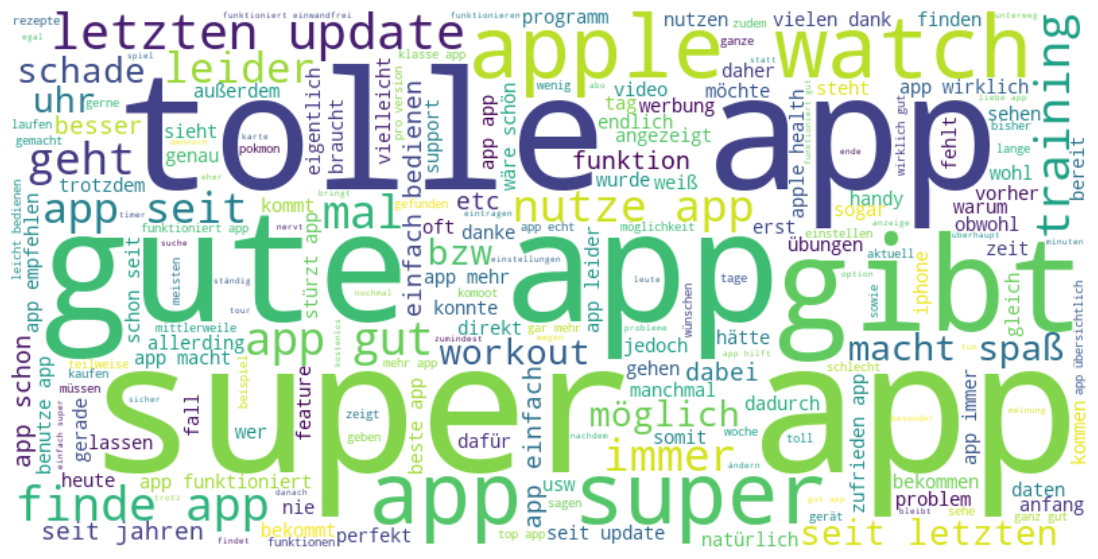

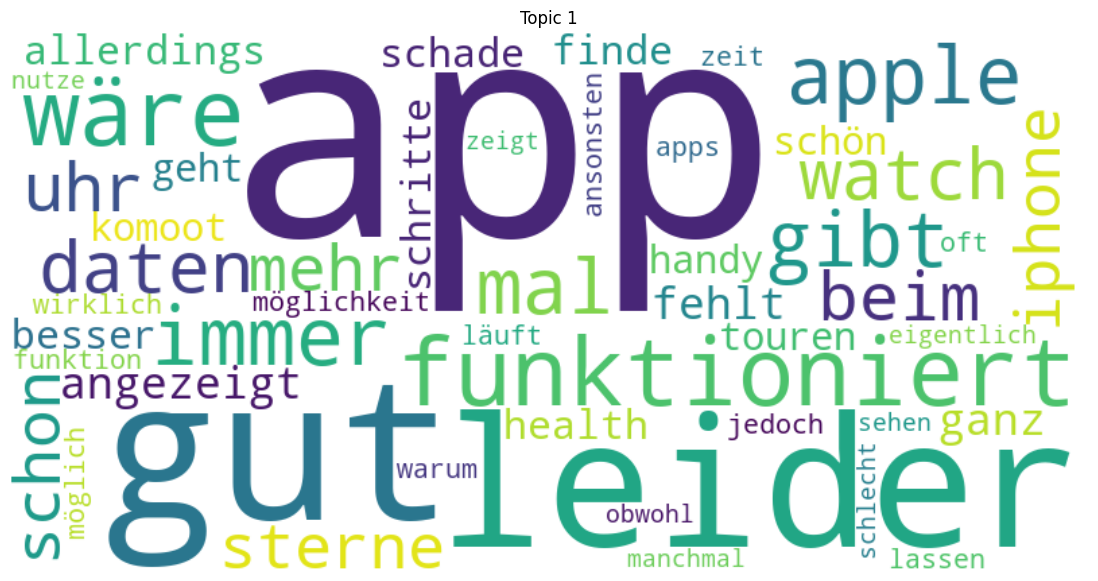

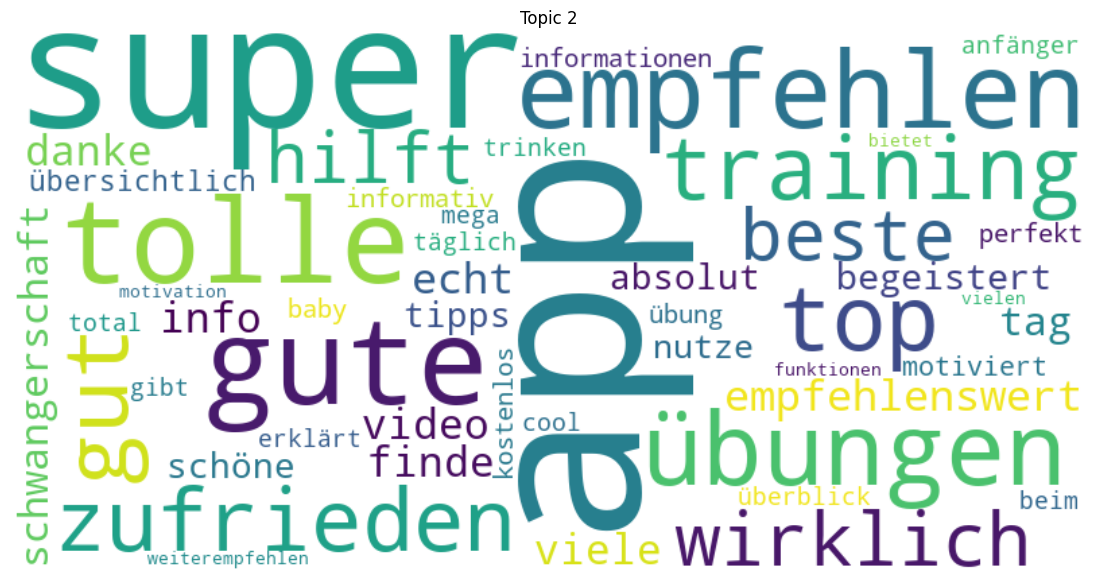

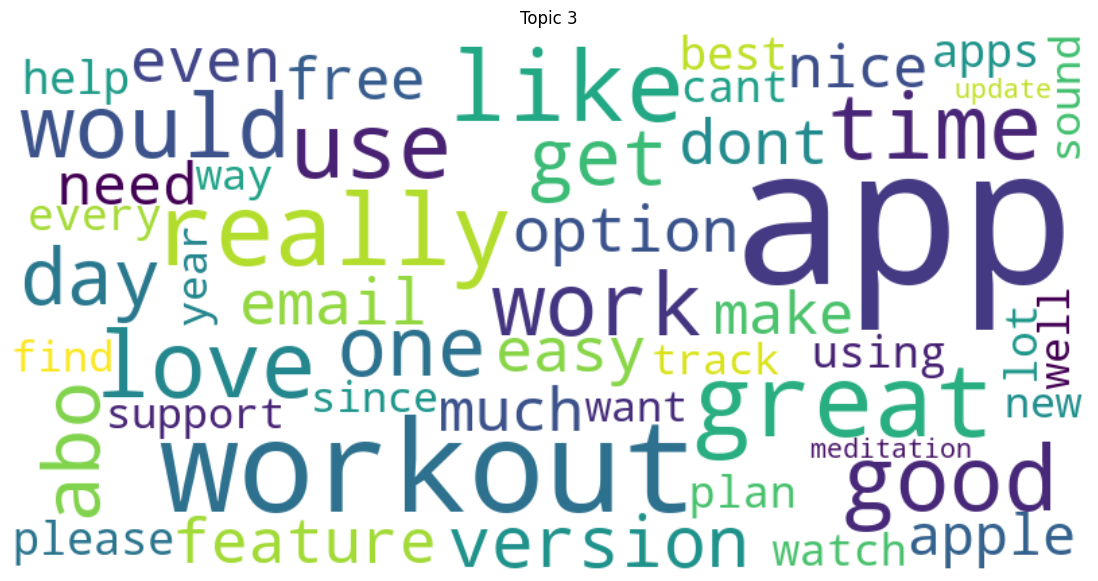

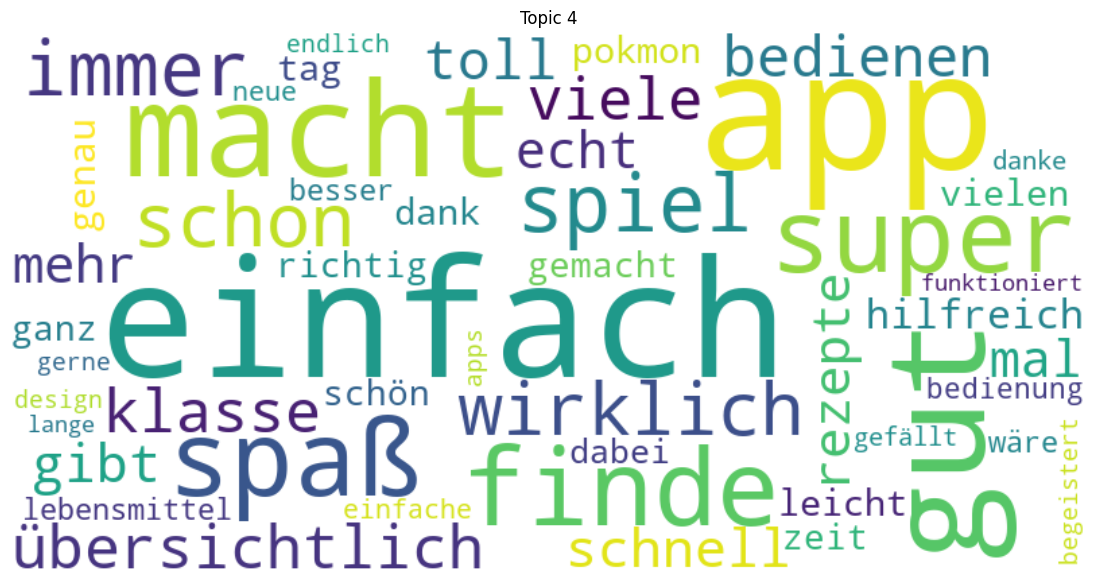

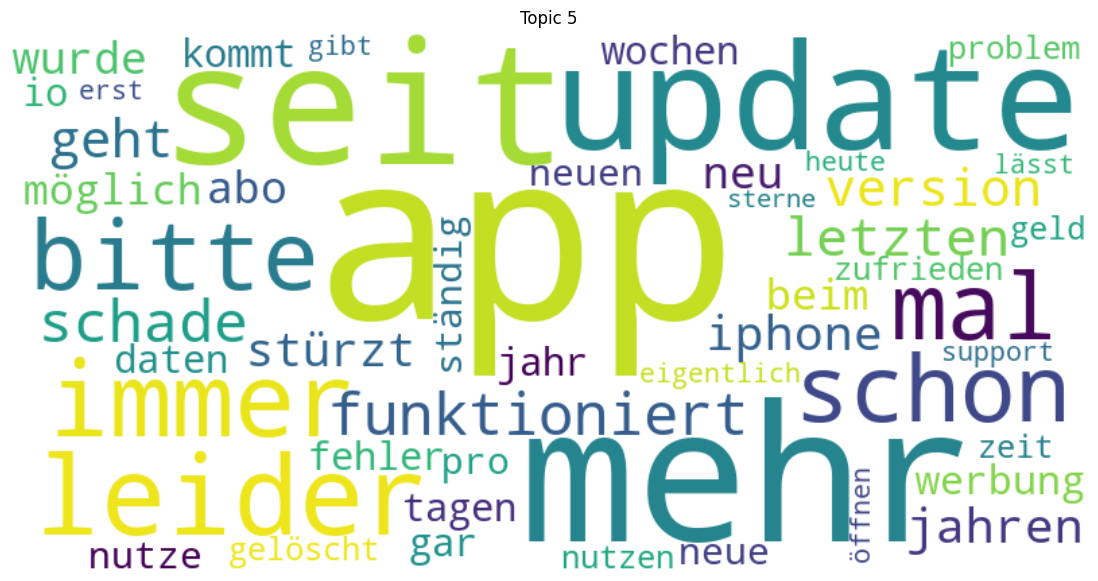

In [87]:
# Gesamtwordcloud
text = " ".join(df["clean_review"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Wordcloud pro Topic
for i, topic in enumerate(lda.components_):
    top_words = {feature_names[j]: topic[j] for j in topic.argsort()[-50:]}
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)
    plt.figure(figsize=(15,7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {i+1}")
    plt.show()


## 4. Modeling Approach

### 4.1 Review Sentiment with Zero-/Few-Shot Learning (SetFit or alternative)

1. Define sentiment classes (e.g., positive / neutral / negative).
2. Manually label a small, balanced subset of reviews.
3. Fine-tune a SetFit model or a LLM model and evaluate performance.
5. Aggregate predicted sentiment to the **app level** (e.g., share of positive reviews).

These aggregated sentiment metrics will be used as features in Section 4.2.

In [ ]:
import pandas as pd
import numpy as np

apps = apps.copy()
reviews = reviews.copy()

# --- Reviewlänge pro Review ---
reviews["word_count"] = reviews["review"].astype(str).apply(lambda x: len(x.split()))

# --- Anzahl langer Reviews pro App ---
long_review_counts = reviews[reviews["word_count"] > 4].groupby("app_id").size()

apps["long_review_count"] = apps["app_id"].map(long_review_counts).fillna(0)

# --- Target Variable ---
apps["high_quality"] = (
    (apps["review_average"] >= 4.3) &
    (apps["review_count"] >= 50) &
    (apps["long_review_count"] >= 10)
).astype(int)

apps["high_quality"].value_counts()


high_quality
0    54409
1     1076
Name: count, dtype: int64

In [36]:
# Sentiment-Proxies
reviews["sentiment"] = reviews["rating"].apply(
    lambda x: 1 if x >= 4 else (-1 if x <= 2 else 0)
)

app_sentiment = reviews.groupby("app_id")["sentiment"].mean()
app_avg_words = reviews.groupby("app_id")["word_count"].mean()

apps["sentiment_score"] = apps["app_id"].map(app_sentiment)
apps["avg_review_length"] = apps["app_id"].map(app_avg_words)

apps.fillna({"sentiment_score": 0, "avg_review_length": 0}, inplace=True)


In [40]:
def clean_price(p):
    if isinstance(p, str):
        p = p.replace("€", "").replace("$", "")  # Währung entfernen
        p = p.replace(",", ".")  # deutsches Komma zu Punkt
        p = p.replace("\xa0", "")  # Non-breaking space
        p = p.strip().lower()
        
        if p in ["gratis", "free", ""] :
            return 0.0
        try:
            return float(p)
        except:
            return np.nan
    return p

apps["price_clean"] = apps["price"].apply(clean_price)
apps["price_clean"] = apps["price_clean"].fillna(0.0)


In [41]:
features = [
    "review_average",
    "review_count",
    "long_review_count",
    "sentiment_score",
    "avg_review_length",
    "price_clean",
    "age"
]

X = apps[features]
y = apps["high_quality"]


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("=== Logistic Regression ===")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Feature Importance (Interpretation)
importance_lr = pd.DataFrame({
    "feature": features,
    "coef": log_reg.coef_[0]
}).sort_values("coef", ascending=False)

importance_lr


=== Logistic Regression ===
[[21739    25]
 [  257   173]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21764
           1       0.87      0.40      0.55       430

    accuracy                           0.99     22194
   macro avg       0.93      0.70      0.77     22194
weighted avg       0.99      0.99      0.98     22194



,feature,coef
0,review_average,1.032060
3,sentiment_score,0.866502
4,avg_review_length,0.017480
1,review_count,0.002321
5,price_clean,0.001175
2,long_review_count,-0.001949
6,age,-0.090700


Modell erkennt low quality Apps sehr zuverlässig (fast alle korrekt klassifiziert).
High quality Apps werden nur zu ~43 % erkannt → viele gute Apps werden übersehen.
Wenn das Modell „high quality“ vorhersagt, stimmt es in 86 % der Fälle.
Insgesamt hohe Genauigkeit (~99 %), aber das liegt an der starken Ungleichverteilung der Klassen.
F1-Score für high quality liegt bei 0.57, zeigt, dass das Modell bei der Minderheitsklasse nicht optimal ist.
Vorteil: leicht interpretierbar, man sieht direkt, welche Features Einfluss haben.
Nachteil: schwache Sensitivität für die guten Apps → Recall zu niedrig.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Modell mit einfachen Hyperparametern
rf = RandomForestClassifier(
    n_estimators=300,  # Anzahl Bäume
    max_depth=6,       # Maximale Tiefe der Bäume
    random_state=42,
    class_weight='balanced'  # Optional: um Class Imbalance auszugleichen
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [55]:
print("=== Random Forest ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))


=== Random Forest ===
Confusion Matrix:
[[21764     0]
 [    2   428]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21764
           1       1.00      1.00      1.00       430

    accuracy                           1.00     22194
   macro avg       1.00      1.00      1.00     22194
weighted avg       1.00      1.00      1.00     22194

Accuracy: 0.9999098855546544
F1-score: 0.9976689976689976


In [56]:
import pandas as pd

importance_rf = pd.DataFrame({
    "feature": features,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("Feature Importance:")
print(importance_rf)


Feature Importance:
             feature  importance
2  long_review_count    0.337782
1       review_count    0.285320
0     review_average    0.161740
4  avg_review_length    0.161671
3    sentiment_score    0.042334
6                age    0.011088
5        price_clean    0.000064


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [4, 6, 8]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
y_pred_best = grid.predict(X_test)
print("F1-score best model:", f1_score(y_test, y_pred_best))


Best Params: {'max_depth': 4, 'n_estimators': 500}
F1-score best model: 1.0


### 4.2 Predictive Modeling of App Quality

1. **Define the target** variable at app level (e.g., high_quality = 1 if avg rating ≥ threshold and sufficient rating count).
2. **Model A – Simple & interpretable:** Logistic Regression or a small Decision Tree.
3. **Model B – More powerful:** e.g., Random Forest or Gradient Boosting with basic hyperparameter tuning.
4. Compare performance (accuracy, precision, recall, F1, ROC-AUC, etc.) and comment on the trade-off between interpretability and performance.

In [ ]:
# 4.2 Predictive Modeling of App Quality
# TODO: Build train/test split, fit Model A and Model B, and evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Example placeholder:
# X = apps_model_features
# y = apps['high_quality']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ...


## 5. Interpretation and Argumentation of Results

1. **Model Interpretation / Explainable AI**
- Inspect and visualize feature importance (e.g., SHAP values or model-specific importances).
- Discuss which features most strongly influence predicted app quality.

2. **Fairness & Bias Reflection**
- Where could sampling bias, measurement error, or missing data affect your results?
- Briefly relate your reflections to fairness notions mentioned in the course.

3. **LLM / SetFit as Method**
- Discuss where these methods might introduce bias or instability.
- Mention how sensitive your results are to label definitions or prompts (short reflection).

4. **Practical Insights for the Clinic**
- List 2–4 concrete, comprehensible recommendations that the mental health unit could use.
- Focus on what your results *suggest they should pay attention to* when recommending apps.

## 6. AI Tools and References

- Briefly describe where AI tools (e.g., ChatGPT, Copilot) were used, in line with FU guidelines.
- List key papers, blog posts, or documentation that you relied on for methods.
